In [71]:
import requests
#import requests_ftp
import requests_cache
import lxml
import urllib2
from bs4 import BeautifulSoup
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
plt.style.use('ggplot')
#requests_cache.install_cache('coll_cache')
%matplotlib inline

In [75]:
def fileReader(files):
    title_names = []
    for f in files:
        title_file = open(f,"r")
        for line in title_file:
            line = line.strip()
            title_names.append(line)
    title_file.close()    
    return title_names
other = ['wsj.txt', 'npr.txt', 'economist.txt']
liberal = ['abc.txt', 'Huffpost.txt', 'nytimes.txt', 'washington.txt']
conservative = ['fox.txt','breitbart.txt']


In [76]:
other = fileReader(other)
liberal = fileReader(liberal)

In [77]:
conservative = fileReader(conservative)

In [78]:
import nltk
import re
from nltk.corpus import stopwords
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [79]:
def posNeg(title_names):
    sid = SentimentIntensityAnalyzer()
    pos = []
    neg = []
    neu = []
    for sentence in title_names:
        #print(sentence)
        ss = sid.polarity_scores(sentence)
        #print ss
        pos.append(ss['pos'])
        neg.append(ss['neg'])
        neu.append(ss['neu'])
    positive = sum([x for x in pos])
    negative = sum([x for x in neg])
    tokentit = [re.sub("[^a-zA-Z]"," ",i) for i in title_names]
    return positive, negative, tokentit

In [80]:
otherPos, otherNeg, otherToken = posNeg(other)

In [81]:
libPos, libNeg, libToken = posNeg(liberal)

In [68]:
libPos

36.76799999999999

In [82]:
conPos, conNeg, conToekn = posNeg(conservative)

In [83]:
conNeg

33.59400000000002

In [88]:
def plotBar(positive, negative, type):
    bars = [positive/(positive + negative),negative/(positive + negative)]
    N = len(bars)
    x = range(N)
    width = 1/1.5
    ind = np.arange(N)  # the x locations for the groups
    fig, ax = plt.subplots()
    this = ax.bar(x, bars, width, color="blue")
    ax.set_ylabel('Percent')
    ax.set_title(type)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('Positive', 'Negative'))
    

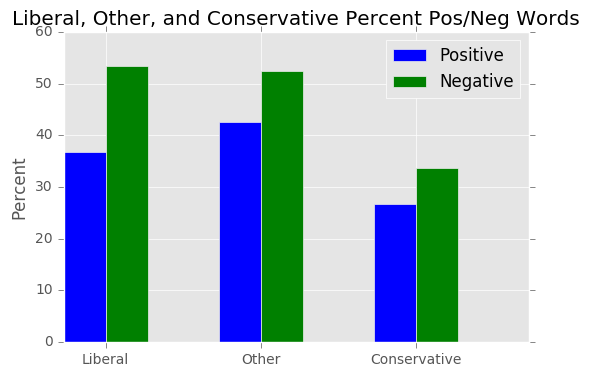

In [99]:
ind = np.arange(3)
width = 0.27  
fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [libPos, otherPos, conPos]
rects1 = ax.bar(ind, yvals, width, color='b')

zvals = [libNeg, otherNeg, conNeg]
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_title("Liberal, Other, and Conservative Percent Pos/Neg Words")
ax.set_xticklabels( ('Liberal', 'Other', 'Conservative') )
ax.legend( (rects1[0], rects2[0]), ('Positive', 'Negative'))
plt.show()

In [111]:
import itertools
def plotWordCloud(tokentit,type):
    trumps_admin = ['whitehouse','trump','conway','sessions','pence','president','tillerson','devos','flynn','kushner','carson','department','preibus','bannon','spicer','miller']
    tokenword = [word_tokenize(w) for w in tokentit]
    merged = list(itertools.chain(*tokenword))
    firstnames = ['steve','donald','jeff','sean']
    words = [w for w in merged if not w in stopwords.words("english")]
    wording = [w for w in words if not w in trumps_admin]
    wordtwo = [w for w in wording if not w in firstnames]
    word = " ".join(wordtwo)
    wordcloudcamp = WordCloud(max_font_size=40).generate(word)
    
    plt.figure()
    plt.title(type)
    plt.imshow(wordcloudcamp)
    plt.axis("off")
 

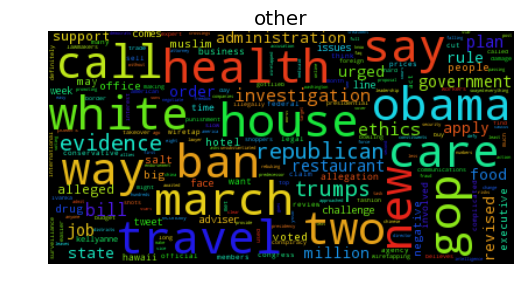

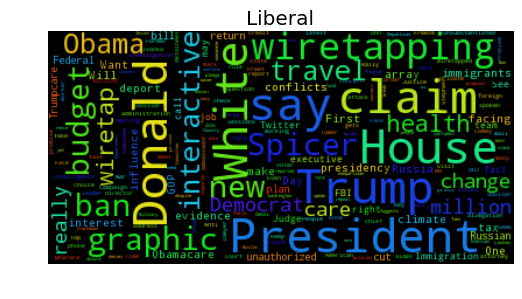

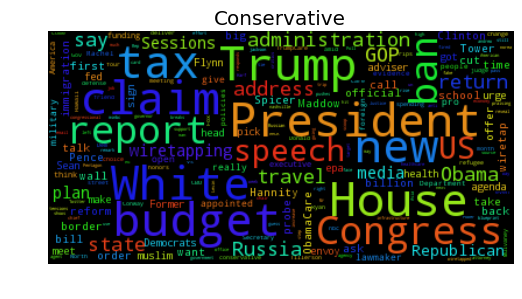

In [115]:
plotWordCloud(otherToken, "other")
plotWordCloud(libToken, "Liberal")
plotWordCloud(conToekn, "Conservative")
plt.show()

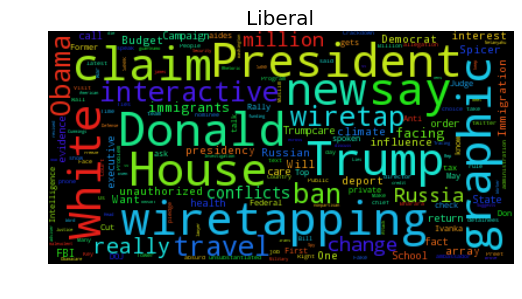

In [19]:
plotWordCloud(libToken, "Liberal")

In [124]:
freqs = nltk.FreqDist(w.lower() for w in libToken.words())

AttributeError: 'list' object has no attribute 'words'

In [127]:
from nltk.corpus import brown

In [129]:
type(brown)

nltk.corpus.reader.tagged.CategorizedTaggedCorpusReader

In [103]:
def sepReader(f):
    title_names = []
    title_file = open(f,"r")
    for line in title_file:
        line = line.strip()
        title_names.append(line)
    title_file.close() 
    sid = SentimentIntensityAnalyzer()
    pos = []
    neg = []
    neu = []
    for sentence in title_names:
        #print(sentence)
        ss = sid.polarity_scores(sentence)
        #print ss
        pos.append(ss['pos'])
        neg.append(ss['neg'])
        neu.append(ss['neu'])
    positive = sum([x for x in pos])
    negative = sum([x for x in neg])
    tokentit = [re.sub("[^a-zA-Z]"," ",i) for i in title_names]
    return positive, negative, tokentit

In [104]:
ecoPos, ecoNeg, ecoTok = sepReader('economist.txt')

In [106]:
nprPos, nprNeg, nprTok = sepReader('npr.txt')

In [107]:
wsjPos, wsjNeg, wsjTok = sepReader('wsj.txt')

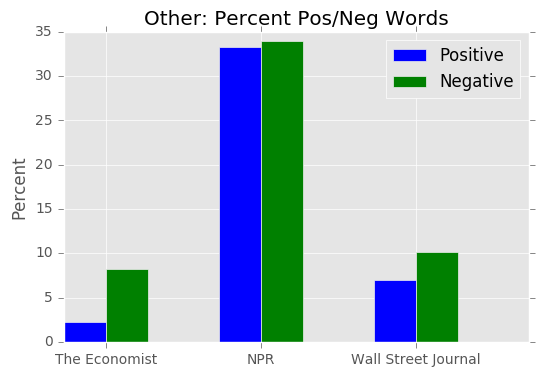

In [108]:
ind = np.arange(3)
width = 0.27  
fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [ecoPos, nprPos, wsjPos]
rects1 = ax.bar(ind, yvals, width, color='b')

zvals = [ecoNeg, nprNeg, wsjNeg]
rects2 = ax.bar(ind+width, zvals, width, color='g')

ax.set_ylabel('Percent')
ax.set_xticks(ind+width)
ax.set_title("Other: Percent Pos/Neg Words")
ax.set_xticklabels( ('The Economist', 'NPR', 'Wall Street Journal') )
ax.legend( (rects1[0], rects2[0]), ('Positive', 'Negative'))
plt.show()